# Visualizing Networks

In [28]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# read in the graph 
GD = nx.read_gpickle('major_us_cities_networkx_ver2')
GD[1]

[('El Paso, TX', 'Albuquerque, NM', {'weight': 367.88584356108345}),
 ('El Paso, TX', 'Mesa, AZ', {'weight': 536.256659972679}),
 ('El Paso, TX', 'Tucson, AZ', {'weight': 425.41386739988224}),
 ('El Paso, TX', 'Phoenix, AZ', {'weight': 558.7835703774161}),
 ('El Paso, TX', 'Colorado Springs, CO', {'weight': 797.7517116740046}),
 ('Long Beach, CA', 'Oakland, CA', {'weight': 579.5829987228403}),
 ('Long Beach, CA', 'Mesa, AZ', {'weight': 590.156204210031}),
 ('Long Beach, CA', 'Sacramento, CA', {'weight': 611.0649790490104}),
 ('Long Beach, CA', 'Tucson, AZ', {'weight': 698.6566667728368}),
 ('Long Beach, CA', 'San Jose, CA', {'weight': 518.2330606219175}),
 ('Long Beach, CA', 'Fresno, CA', {'weight': 360.4704577972272}),
 ('Long Beach, CA', 'San Diego, CA', {'weight': 151.45008247402757}),
 ('Long Beach, CA', 'Phoenix, AZ', {'weight': 567.4125390872786}),
 ('Long Beach, CA', 'San Francisco, CA', {'weight': 585.6985397766858}),
 ('Long Beach, CA', 'Los Angeles, CA', {'weight': 31.6941956

In [29]:
G = nx.Graph(incoming_graph_data=GD[1])

In [30]:
G.edges(data=True)

EdgeDataView([('El Paso, TX', 'Albuquerque, NM', {'weight': 367.88584356108345}), ('El Paso, TX', 'Mesa, AZ', {'weight': 536.256659972679}), ('El Paso, TX', 'Tucson, AZ', {'weight': 425.41386739988224}), ('El Paso, TX', 'Phoenix, AZ', {'weight': 558.7835703774161}), ('El Paso, TX', 'Colorado Springs, CO', {'weight': 797.7517116740046}), ('Albuquerque, NM', 'Mesa, AZ', {'weight': 514.5675468665884}), ('Albuquerque, NM', 'Tucson, AZ', {'weight': 510.7965704802782}), ('Albuquerque, NM', 'Phoenix, AZ', {'weight': 534.0407586326625}), ('Albuquerque, NM', 'Denver, CO', {'weight': 536.4291827646916}), ('Albuquerque, NM', 'Colorado Springs, CO', {'weight': 445.6400042319895}), ('Albuquerque, NM', 'Las Vegas, NV', {'weight': 779.953416852203}), ('Mesa, AZ', 'Long Beach, CA', {'weight': 590.156204210031}), ('Mesa, AZ', 'Tucson, AZ', {'weight': 157.26017307785148}), ('Mesa, AZ', 'San Diego, CA', {'weight': 502.32635614606744}), ('Mesa, AZ', 'Phoenix, AZ', {'weight': 22.79553039579591}), ('Mesa, A

<IPython.core.display.Javascript object>


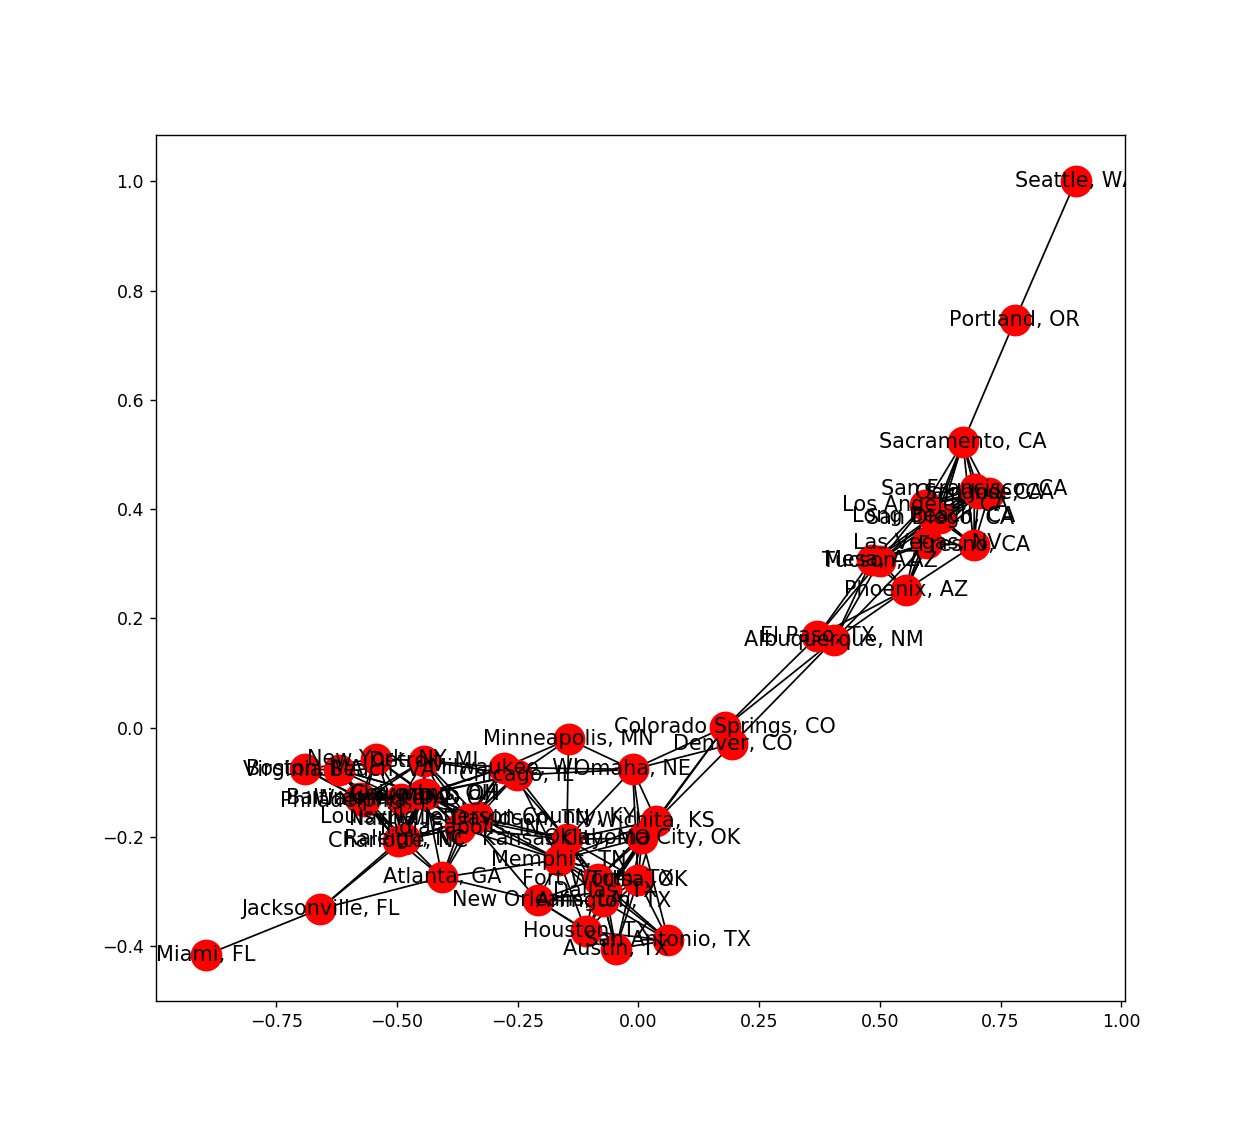

In [31]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [32]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

<IPython.core.display.Javascript object>


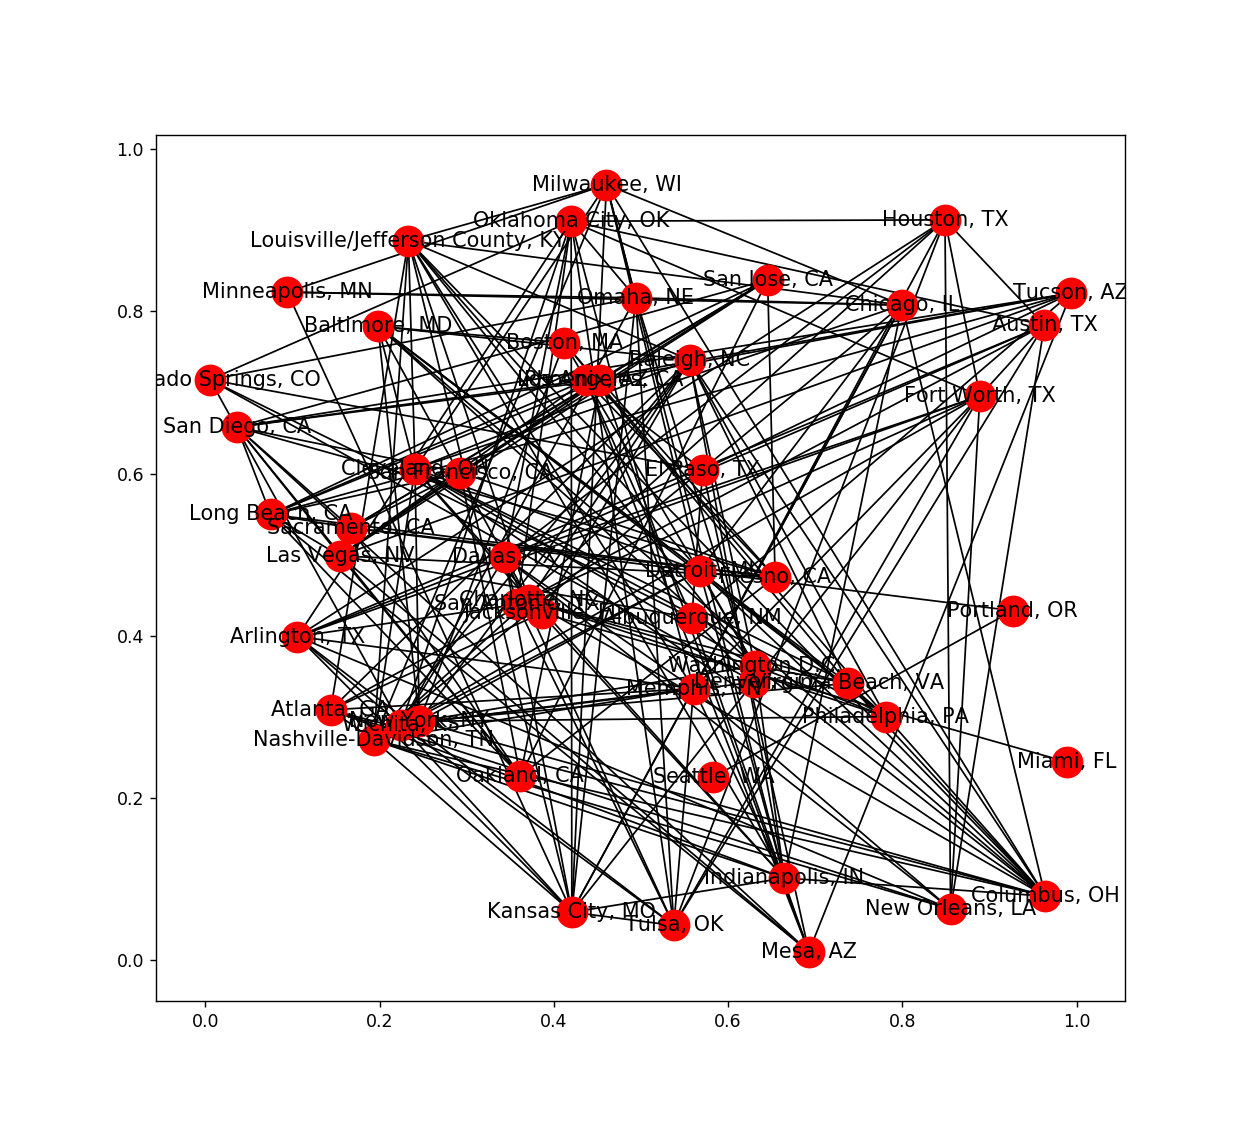

In [33]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


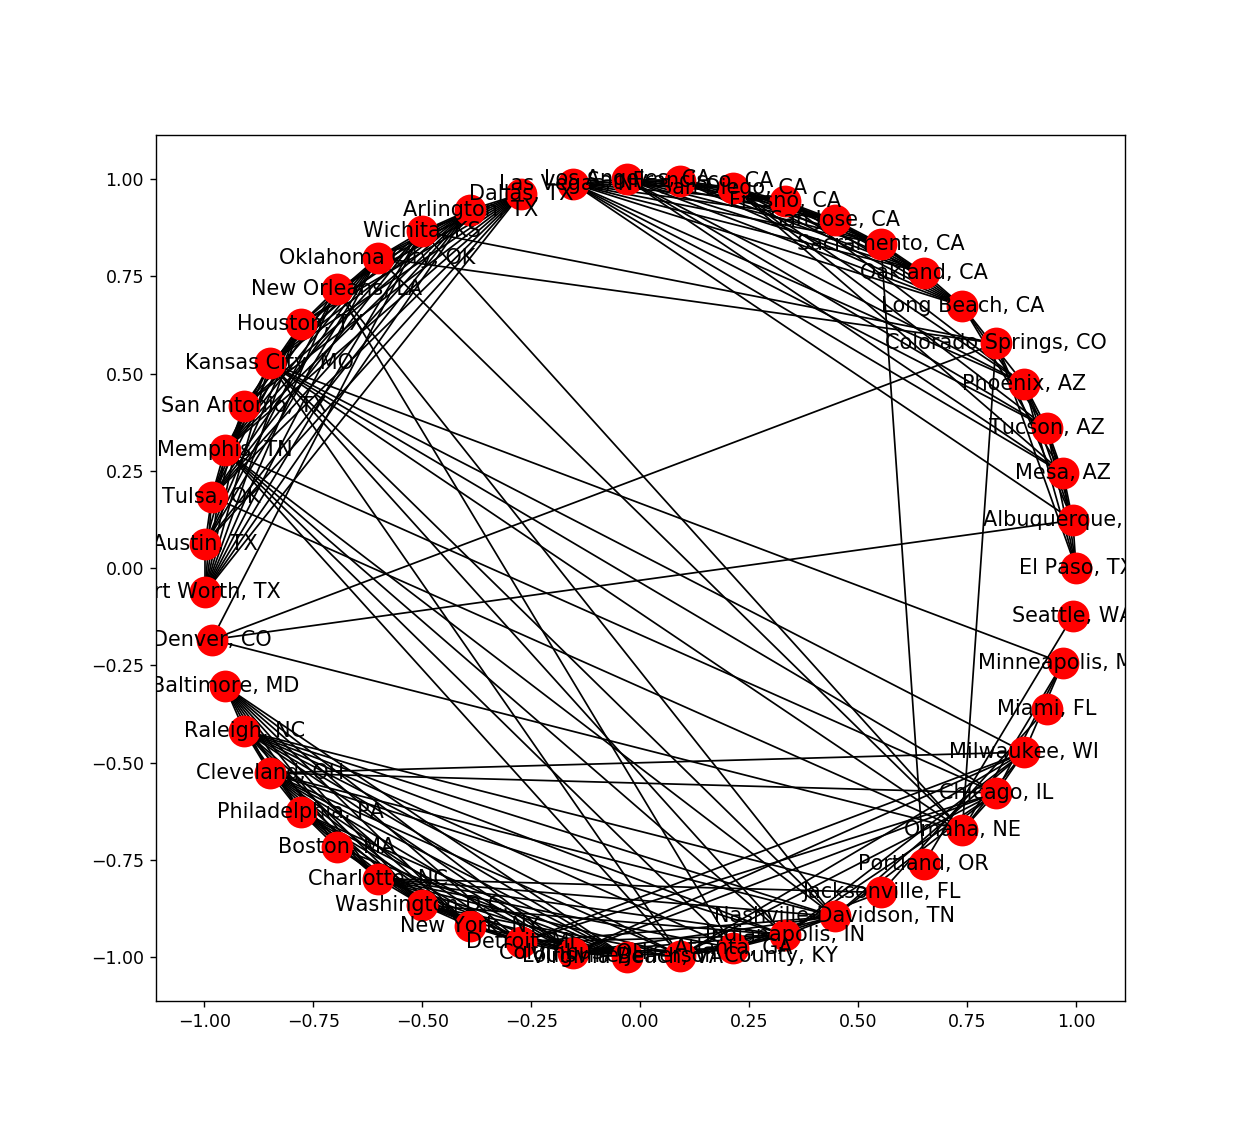

In [34]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

In [35]:
G.add_nodes_from(GD[0])

<IPython.core.display.Javascript object>


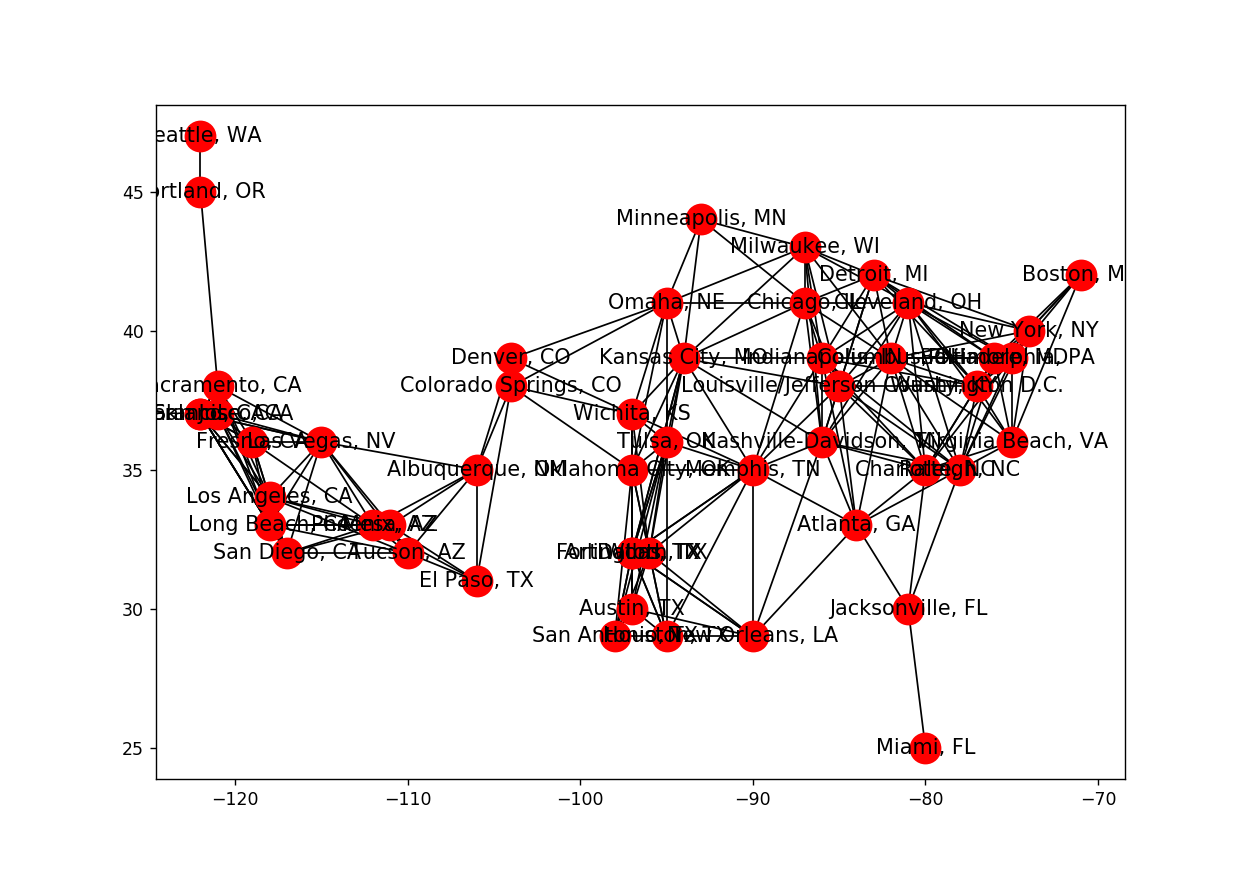

In [36]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


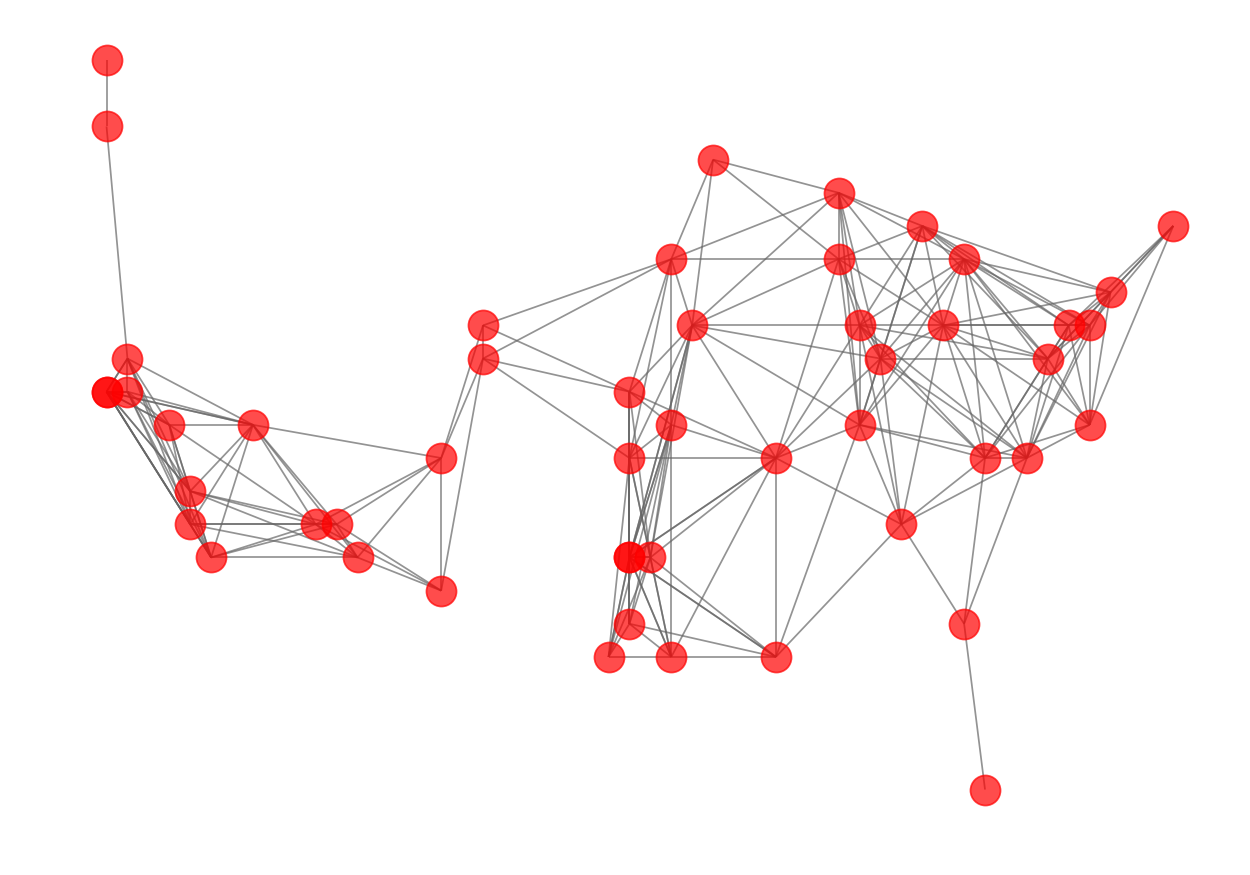

In [37]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


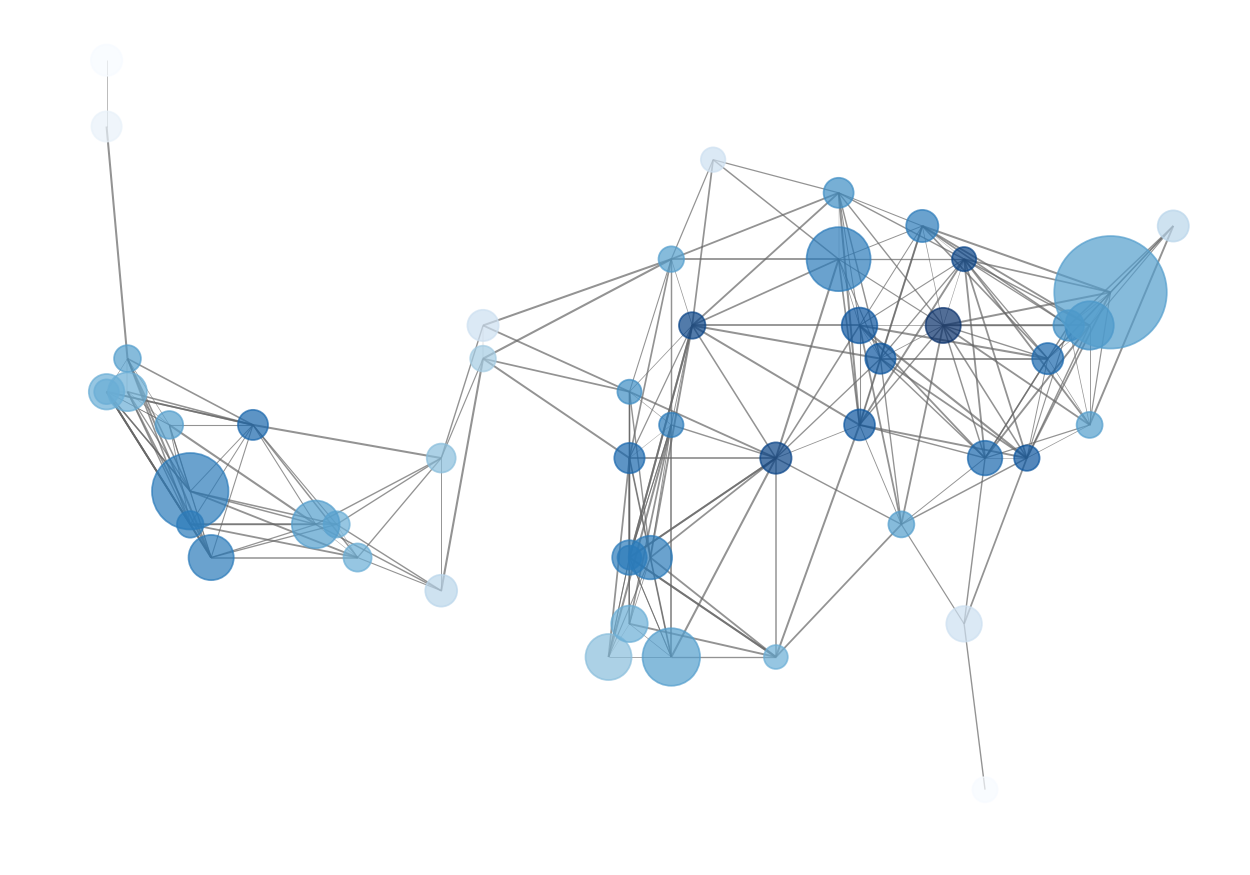

In [38]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


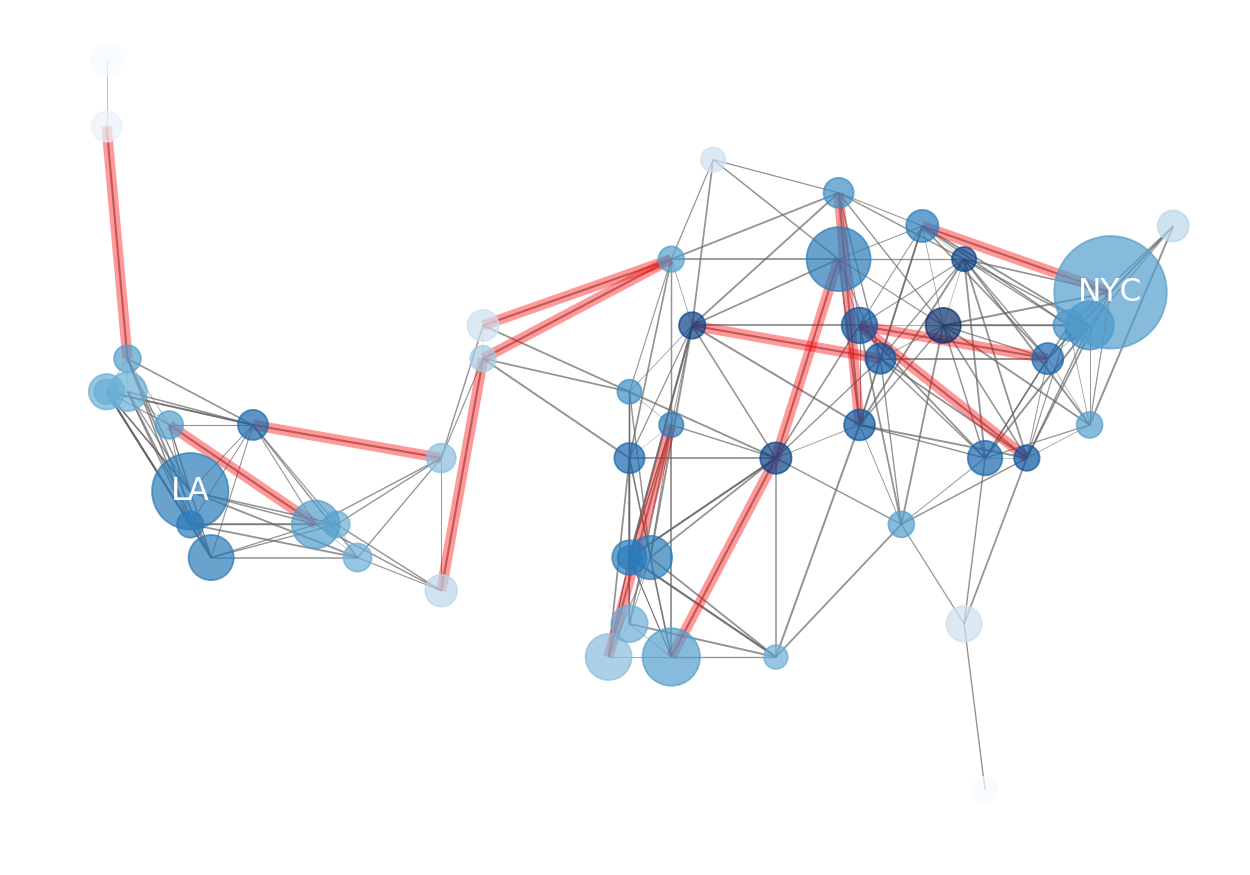

In [39]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();